In [1]:
import tensorflow as tf
tf.enable_eager_execution()

### 3.1 TensorFlow 1+1

In [2]:
A = tf.constant([[1, 2], [3, 4]])
B = tf.constant([[5, 6], [7, 8]])
C = tf.matmul(A ,B)

print(C)

tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)


In [3]:
import tensorflow as tf
tf.enable_eager_execution()

a = tf.constant(1)
b = tf.constant(1)
c = tf.add(a, b) 
print(c)

A = tf.constant([[1, 2], [3, 4]])
B = tf.constant([[5, 6], [7, 8]])
C = tf.matmul(A, B)
print(C)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)


#### tf.GradientTape()

In [4]:
tf.enable_eager_execution

x = tf.get_variable(name='x', shape=[1], initializer=tf.constant_initializer(3.))

with tf.GradientTape() as tape:  # 在tf.GradientTape() 的上下文内，所有计算步骤都会被记录以用于求导
    
    y = tf.square(x)

y_grad = tape.gradient(y, x)  # 计算y 关于x 的导数

print(y)
print(y_grad)

tf.Tensor([9.], shape=(1,), dtype=float32)
tf.Tensor([6.], shape=(1,), dtype=float32)


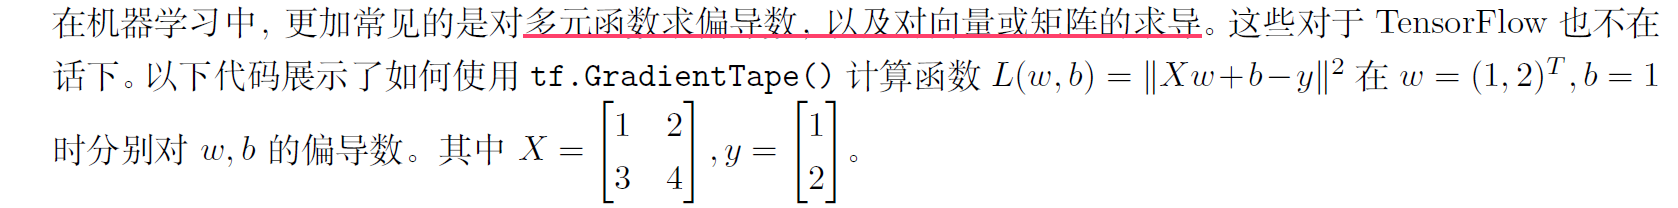

In [5]:
tf.enable_eager_execution

x = tf.constant([[1., 2.], [3., 4.]])
y = tf.constant([[1.], [2.]])
w = tf.get_variable('w', shape=[2, 1], initializer=tf.constant_initializer([[1.], [2.]]))
b = tf.get_variable('b', shape=[1], initializer=tf.constant_initializer([1.]))

with tf.GradientTape() as tape:
    
    L = 0.5 * tf.reduce_sum(tf.square(x * w + b - y))

w_grad, b_grad = tape.gradient(L, [w, b])  # 计算L(w, b) 关于w, b 的偏导数

print(L)
print(w_grad)
print(b_grad)    

tf.Tensor(39.5, shape=(), dtype=float32)
tf.Tensor(
[[ 5.]
 [43.]], shape=(2, 1), dtype=float32)
tf.Tensor([15.], shape=(1,), dtype=float32)


### 3.2 基础示例：线性回归

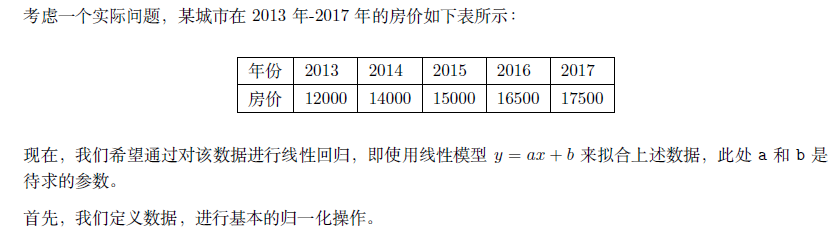

In [41]:
import numpy as np

X_raw = np.array([2013, 2014, 2015, 2016, 2017])
y_raw = np.array([12000, 14000, 15000, 16500, 17500])

# Simple Normalization
X = (X_raw - X_raw.min()) / (X_raw.max() - X_raw.min())
y = (y_raw - y_raw.min()) / (y_raw.max() - y_raw.min())

print(X, '\n', y)

[0.   0.25 0.5  0.75 1.  ] 
 [0.         0.36363636 0.54545455 0.81818182 1.        ]


**手工求损失函数 and NumPy GradientDescent**

In [42]:
a, b = 0, 0
iter = 10000
lr = 1e-3

for i in range(iter):
    
    y_pred = a * X + b
    # Gradient
    a_grad, b_grad = (y_pred - y).dot(X), (y_pred - y).sum()
    
    # Updata
    a, b = a - (lr*a_grad), b - (lr*b_grad)

print(a, b)
print(y_pred - y)

0.9763702087567374 0.05756498076575413
[ 0.05756646 -0.06197802  0.00029568 -0.0283397   0.033934  ]


**用 TensorFlow 自动GD**

In [54]:
X = tf.constant(X, dtype=tf.float64)
y = tf.constant(y, dtype=tf.float64)

a = tf.get_variable('a', dtype=tf.float64, shape=[], initializer=tf.zeros_initializer)
b = tf.get_variable('b', dtype=tf.float64, shape=[], initializer=tf.zeros_initializer)
variables = [a, b]

num_epoch = 10000
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-3)
y_pred = a * X + b
for e in range(1):
    
    # 使用tf.GradientTape() 记录损失函数的梯度信息
    with tf.GradientTape() as tape:
        y_pred = a * X + b
        loss = 0.5 * tf.reduce_sum(tf.square(y_pred - y))
        
    # Compute the Gradient
    grads = tape.gradient(loss, variables)
    
    # TensorFlow 自动根据Grads更新参数
    optimizer.apply_gradients(grads_and_vars=zip(grads, variables))
    